In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def plot_average_score_bins(areas, scores, numbins):
  bins = np.linspace(0, np.max(areas), numbins)
  bin_indices = np.digitize(areas, bins)
  mean_scores = []
  bar_titles = []

  for i in range(0, len(bins)-1):
    binned_scores = scores[bin_indices == i+1]
    mean_scores.append(binned_scores.mean())
    score_range = f'{bins[i]:.2f}-{bins[i+1]:.2f}'
    bar_titles.append(score_range)
  plt.figure(figsize=(20,10))
  plt.bar(bar_titles, mean_scores)
  for i, value in enumerate(mean_scores):
      plt.text(i, value+0.001, f"{value:.4f}", ha='center', fontsize=10)

  plt.xticks(rotation=90)
  plt.xlabel("Bin for Bounding Box Size")
  plt.ylabel("Average Score")
  plt.show()

def plot_prediction_results_by_size(pred_path, numbins):
    with open(pred_path) as f:
        data = json.load(f)
        
    areas = []
    scores = []

    for item in data:
        bbox = item['bbox']
        x,y,ht,wd = bbox
        areas.append(ht*wd)
        score = item['score']
        scores.append(score)

    areas = np.array(areas)
    scores = np.array(scores)

    plot_average_score_bins(areas, scores, numbins)

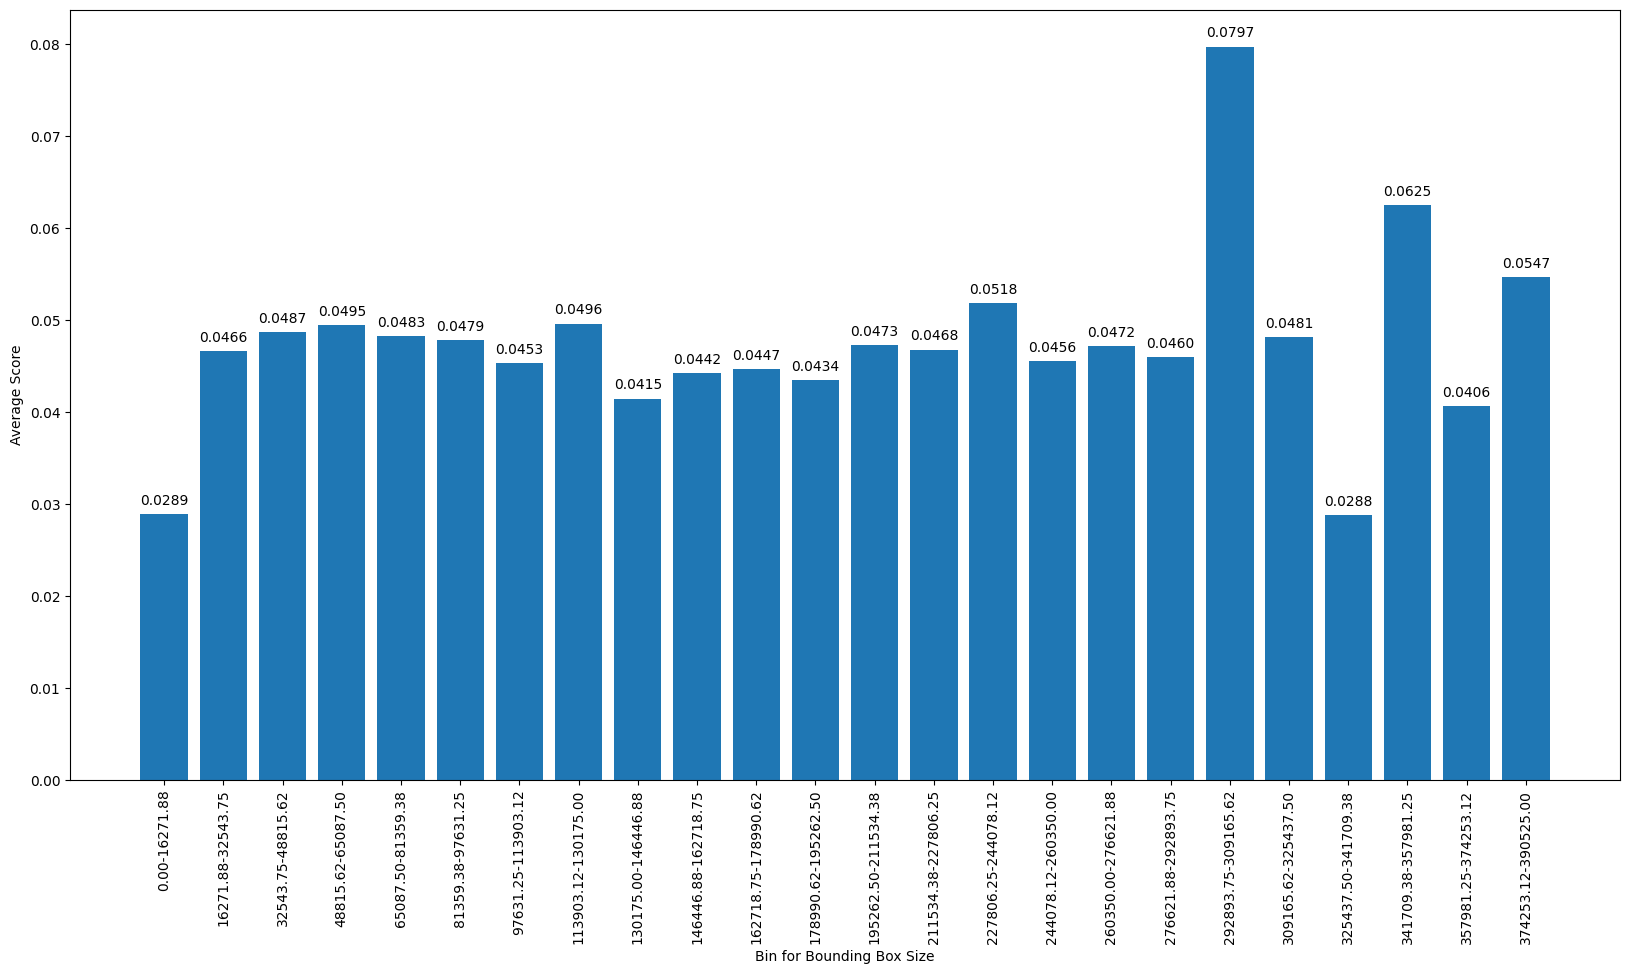

In [9]:
plot_prediction_results_by_size('../../train_results_original/_predictions.json', 25)

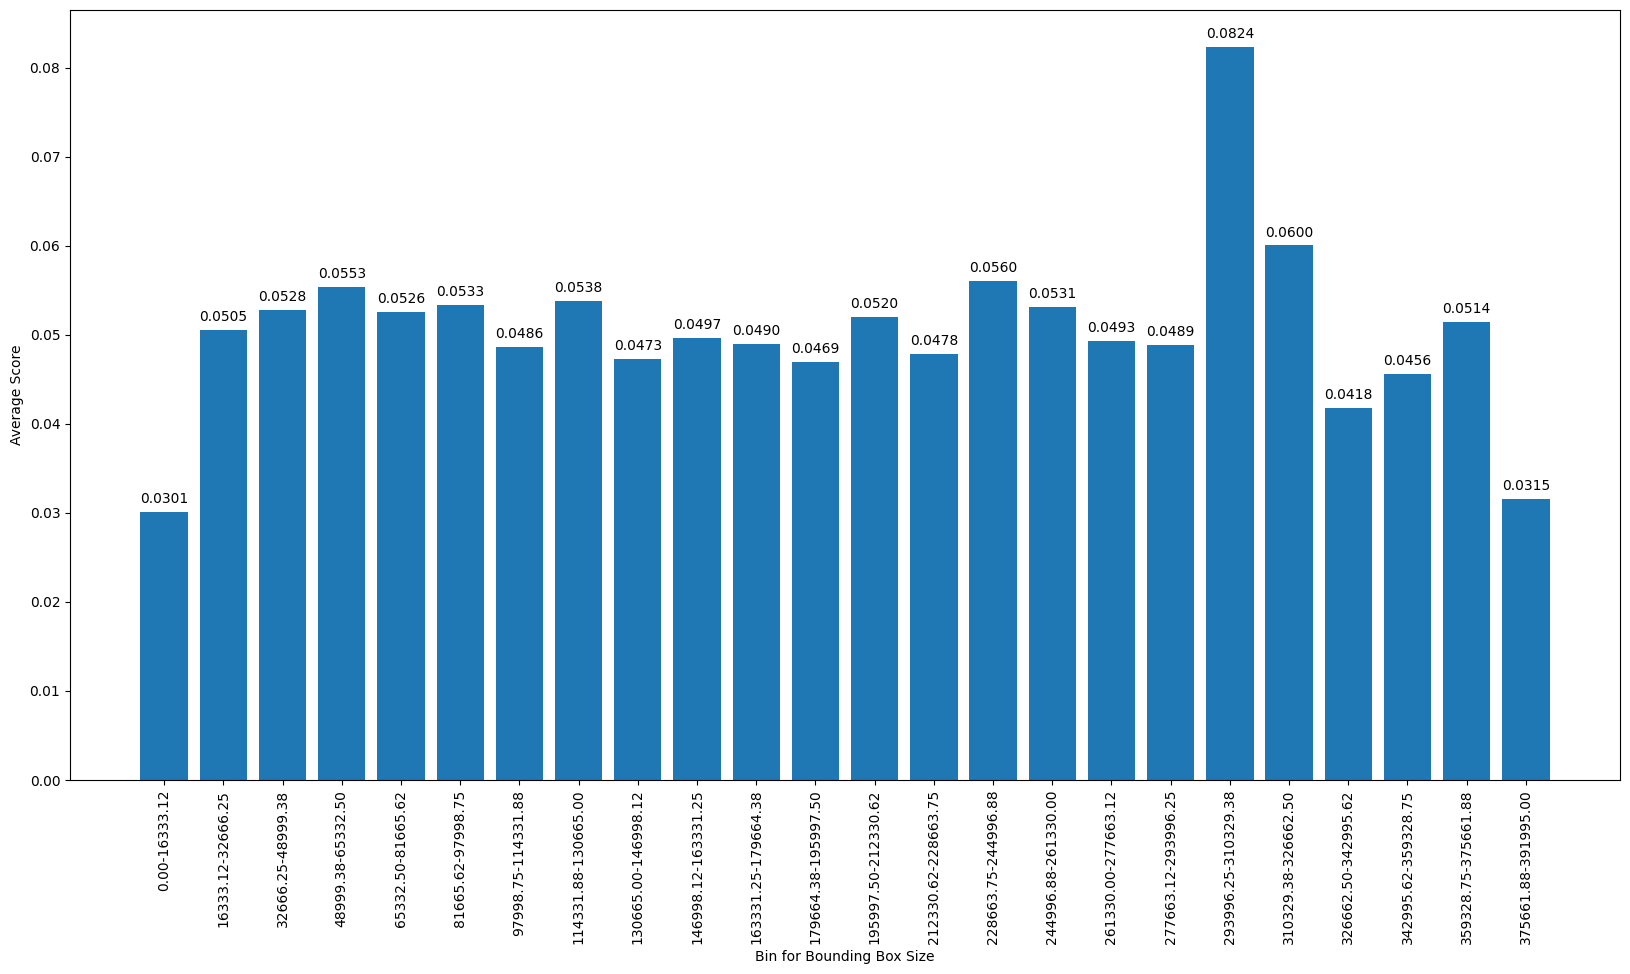

In [10]:
plot_prediction_results_by_size('../../train_results_average_pooling/_predictions.json', 25)

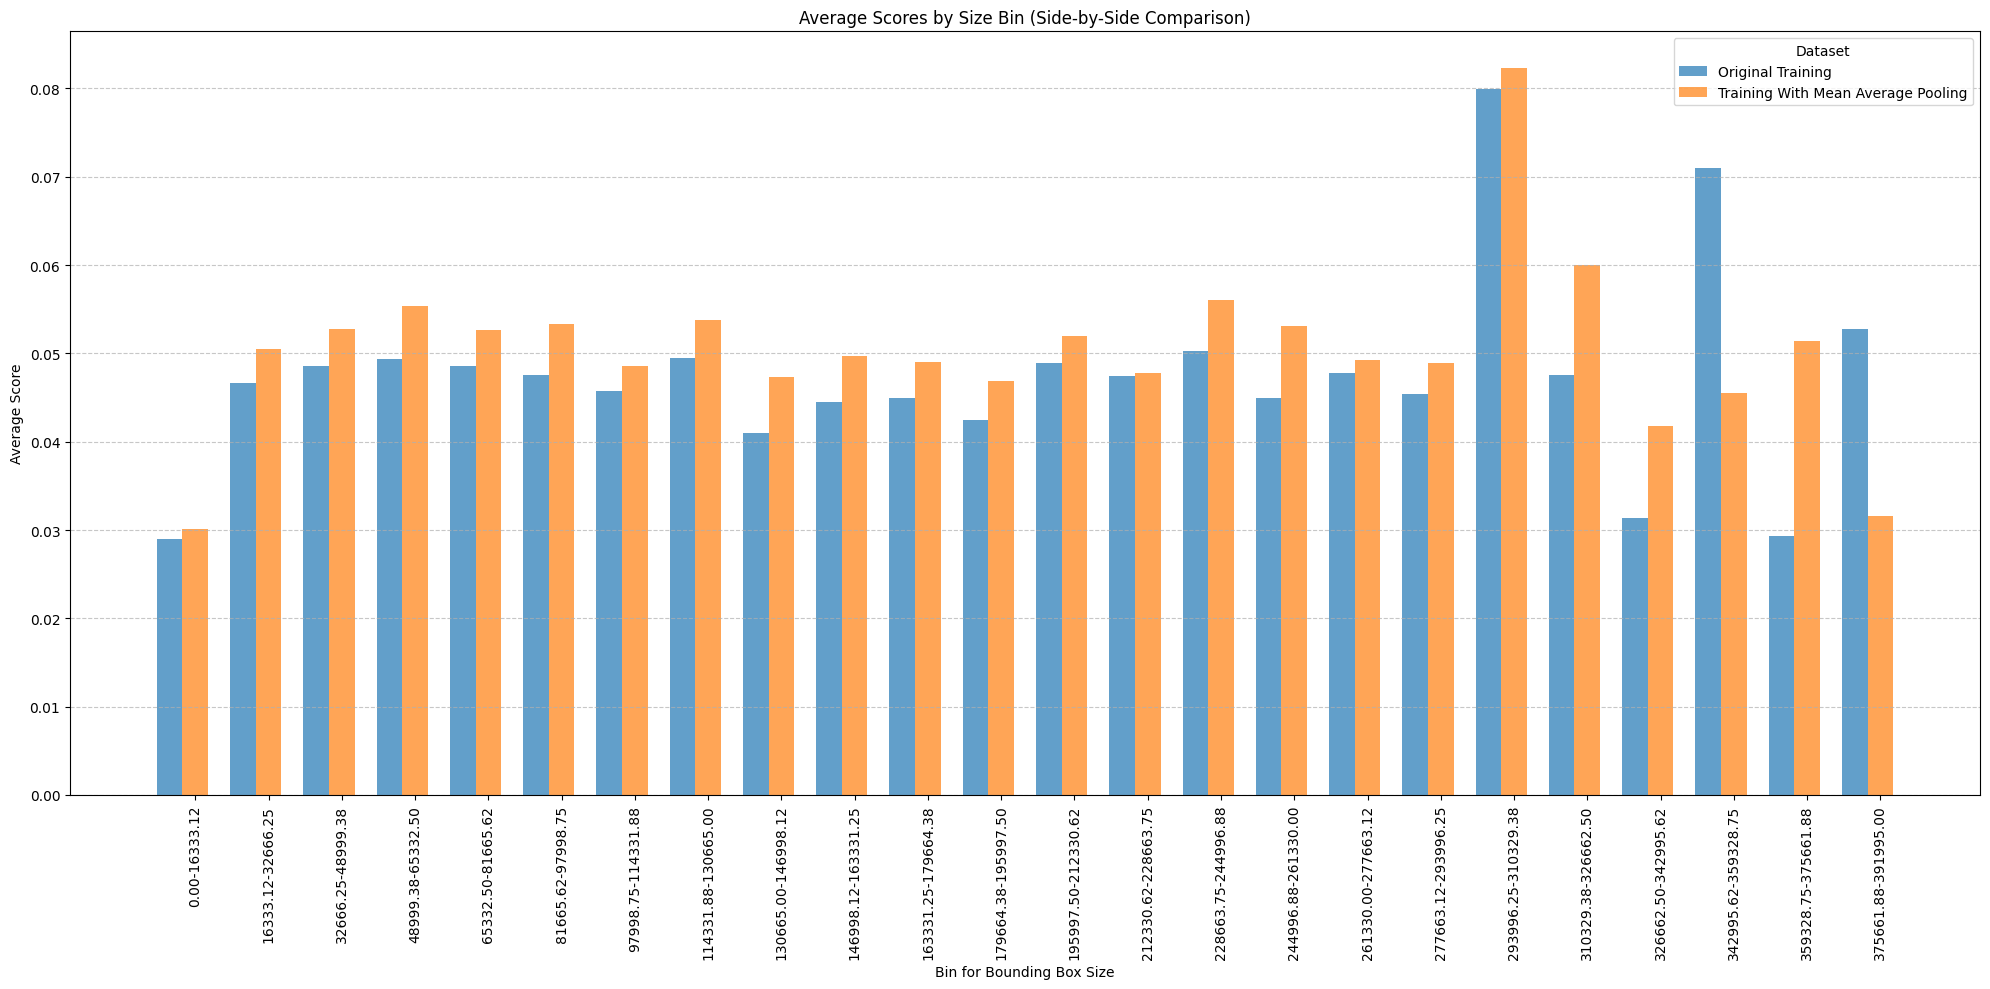

In [12]:
def plot_average_score_bins_side_by_side(areas_list, scores_list, numbins, labels):
    bins = np.linspace(0, max(max(areas) for areas in areas_list), numbins)
    bin_width = 0.35  # Width of each bar in the grouped bar chart
    bin_centers = range(len(bins) - 1)
    
    # Prepare the data
    mean_scores_list = []
    for areas, scores in zip(areas_list, scores_list):
        bin_indices = np.digitize(areas, bins)
        mean_scores = []
        for i in range(0, len(bins) - 1):
            binned_scores = scores[bin_indices == i + 1]
            mean_scores.append(binned_scores.mean() if len(binned_scores) > 0 else 0)
        mean_scores_list.append(mean_scores)
    
    # Plot the data
    plt.figure(figsize=(20, 10))
    for i, (mean_scores, label) in enumerate(zip(mean_scores_list, labels)):
        offsets = np.array(bin_centers) + (i - len(labels) / 2) * bin_width
        plt.bar(offsets, mean_scores, width=bin_width, label=label, alpha=0.7)
    
    # Set up the x-axis
    bar_titles = [f'{bins[i]:.2f}-{bins[i + 1]:.2f}' for i in range(len(bins) - 1)]
    plt.xticks(bin_centers, bar_titles, rotation=90)
    plt.xlabel("Bin for Bounding Box Size")
    plt.ylabel("Average Score")
    plt.title("Average Scores by Size Bin (Side-by-Side Comparison)")
    plt.legend(title="Dataset")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_prediction_results_side_by_side(pred_paths, numbins, labels):
    areas_list = []
    scores_list = []

    for pred_path in pred_paths:
        with open(pred_path) as f:
            data = json.load(f)

        areas = []
        scores = []

        for item in data:
            bbox = item['bbox']
            x, y, ht, wd = bbox
            areas.append(ht * wd)
            score = item['score']
            scores.append(score)

        areas_list.append(np.array(areas))
        scores_list.append(np.array(scores))

    plot_average_score_bins_side_by_side(areas_list, scores_list, numbins, labels)

# Example usage:
# Compare two prediction files
plot_prediction_results_side_by_side(
    ['../../train_results_original/_predictions.json', '../../train_results_average_pooling/_predictions.json'],
    numbins=25,
    labels=["Original Training", "Training With Mean Average Pooling"]
)